In [1]:
import pandas as pd
import numpy as np

In [5]:
dfi=pd.read_csv("fct_invoice.csv").copy() #open csv file 

In [27]:
dfc=pd.read_json("dim_customer.json").copy() #open csv file 

In [7]:
dfi

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [28]:
dfc

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [13]:
#1. How many unique customers are in the dataset? 5191 

dfi["customer_id"].nunique()

5191

In [18]:
#2. What are the different categories of products available? How many unique categories are there? 
#['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage','Toys', 'Technology', 'Souvenir']
#There are 8 unique categories
dfi["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [16]:
dfi["category"].nunique()

8

In [22]:
#3. Which payment method is the most popular? How many times was it used?
# Cash
# 44447 times
dfi['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [25]:
#1. What are the three most popular categories, by total sales? 
#(1) Clothing, (2) Cosmetics, (3) Food and Beverage
dfi.groupby(by=['category']).sum()['quantity'] #Total Sales

category
Books               14982
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Shoes               30217
Souvenir            14871
Technology          15021
Toys                30321
Name: quantity, dtype: int64

In [26]:
dfi.groupby(by=['category']).sum()['quantity'].rank(ascending=False) #Rank of total sales with 1-highest sales, 7-lowest sales

category
Books              7.0
Clothing           1.0
Cosmetics          2.0
Food & Beverage    3.0
Shoes              5.0
Souvenir           8.0
Technology         6.0
Toys               4.0
Name: quantity, dtype: float64

In [38]:
#2. What are the total sales attributed to customers over the age of 45?
#84307291.82000001

dfi["id"]=dfi["customer_id"] # Merged the two files 

df=pd.merge(dfi,dfc,on="id")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,id,age,first_name,gender,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,229,NaN,William,M,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,229,NaN,William,M,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,229,NaN,William,M,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,229,NaN,William,M,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,229,NaN,William,M,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,4973,NaN,Melissa,F,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,6161,36.0,Leslie,F,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,6779,NaN,Kelly,F,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,8386,47.0,Shawn,M,Perez


In [54]:
df['sales']=df['price']*df['quantity'] #added a sales column for easier navigation
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,id,age,first_name,gender,last_name,sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,229,NaN,William,M,Anderson,7502.00
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,229,NaN,William,M,Anderson,162.64
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,229,NaN,William,M,Anderson,5401.53
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,229,NaN,William,M,Anderson,2700.72
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,229,NaN,William,M,Anderson,15004.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,4973,NaN,Melissa,F,Bell,600.17
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,6161,36.0,Leslie,F,Bass,378.75
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,6779,NaN,Kelly,F,Roberts,7502.00
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,8386,47.0,Shawn,M,Perez,1200.32


In [55]:
is_age=df['age']>=45 #made a filter to find those aged 45 and up
df[is_age].sum()['sales'] #used the filter to get the total sales

84307291.82000001

In [61]:
#3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
df['invoice_date']=pd.to_datetime(df['invoice_date'], format="%d/%m/%Y")

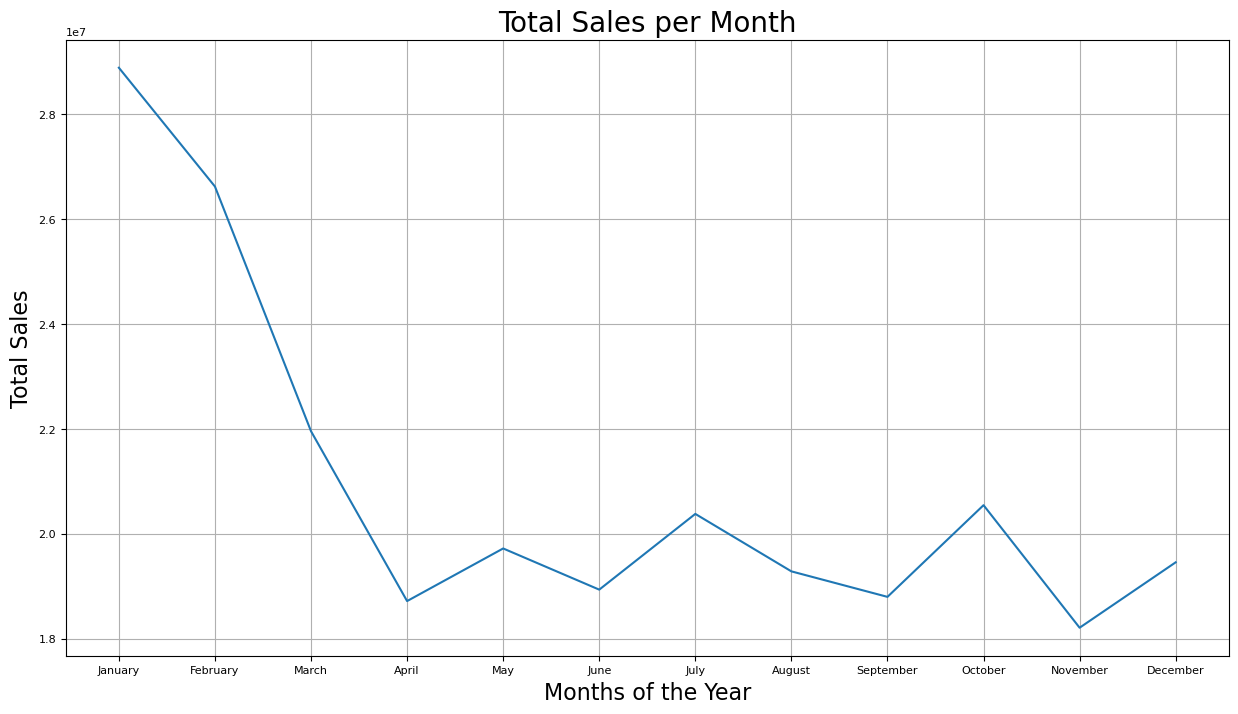

In [103]:
monthsales=df.groupby(df.invoice_date.dt.month)['sales'].sum()
monthsales.plot()

plt.xticks(ticks=monthsales.index, labels=[calendar.month_name[i] for i in monthsales.index])
plt.xlabel('Months of the Year',fontsize= 16)
plt.ylabel('Total Sales', fontsize= 16)
plt.title('Total Sales per Month', fontsize=20)
plt.grid(True)
plt.rcParams['figure.figsize'] = (15, 8)
plt.show()

In [83]:
import matplotlib.pyplot as plt

In [120]:
#1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

def decade(age):
    int = (age // 10) * 10
    end_range = int + 9
    return f"{int}-{end_range}" #return as string for label

df['decade'] = df['age'].apply(decade)

pivot_table = pd.pivot_table(
    df, 
    values='sales', 
    index=['category', 'decade'], 
    aggfunc='sum'
)
pivot_table

sales
category        decade                
Books           10.0-19.0     12801.75
                20.0-29.0     79461.75
                30.0-39.0     84143.10
                40.0-49.0     87203.40
                50.0-59.0     74962.20
                60.0-69.0     80476.80
                70.0-79.0     54827.85
                80.0-89.0     26664.00
                nan-nan      334012.05
Clothing        10.0-19.0   1927413.84
                20.0-29.0  10250732.80
                30.0-39.0  11354126.96
                40.0-49.0  11215189.92
                50.0-59.0  10321851.76
                60.0-69.0  10660642.08
                70.0-79.0   7769371.28
                80.0-89.0   4493698.00
                nan-nan    46003764.40
Cosmetics       10.0-19.0    109619.36
                20.0-29.0    605915.32
                30.0-39.0    723544.70
                40.0-49.0    665034.96
                50.0-59.0    587780.96
                60.0-69.0    649990.76
                70.0-79.0    419082.62
                80.0-89.0    254531.60
                nan-nan     2777362.62
Food & Beverage 10.0-19.0     13582.31
                20.0-29.0     73491.96
                30.0-39.0     87246.86
                40.0-49.0     89553.29
                50.0-59.0     72425.04
                60.0-69.0     80976.09
                70.0-79.0     55050.98
                80.0-89.0     31332.93
                nan-nan      345875.59
Shoes           10.0-19.0    993281.35
                20.0-29.0   5924878.24
                30.0-39.0   7200839.66
                40.0-49.0   7025590.02
                50.0-59.0   5852857.84
                60.0-69.0   5978893.54
                70.0-79.0   4480269.05
                80.0-89.0   2628744.60
                nan-nan    26468097.17
Souvenir        10.0-19.0     12375.15
                20.0-29.0     54943.32
                30.0-39.0     64092.72
                40.0-49.0     66391.80
                50.0-59.0     54943.32
                60.0-69.0     55025.43
                70.0-79.0     38673.81
                80.0-89.0     23718.06
                nan-nan      265661.04
Technology      10.0-19.0   1129800.00
                20.0-29.0   5261550.00
                30.0-39.0   6159300.00
                40.0-49.0   5954550.00
                50.0-59.0   4435200.00
                60.0-69.0   5471550.00
                70.0-79.0   3638250.00
                80.0-89.0   1946700.00
                nan-nan    23865450.00
Toys            10.0-19.0     60426.24
                20.0-29.0    385100.80
                30.0-39.0    420582.40
                40.0-49.0    390906.88
                50.0-59.0    345067.52
                60.0-69.0    363955.20
                70.0-79.0    273244.16
                80.0-89.0    153932.80
                nan-nan     1587210.24